<a href="https://colab.research.google.com/github/adminshivam/Data-Science/blob/main/Seaborn_Practice_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SEABORN***

> *This is an notebook for seaborn document tutorial. Covers almost all functions provided by seaborn as of year 2021. Besides this please do check for updates.*






## **Importing Libraries**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing Dataset**

> **Note : May use another dataset aterwards**



In [126]:
df = sns.load_dataset("tips")

## **Relational Plots**

### **relplot**

In [69]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


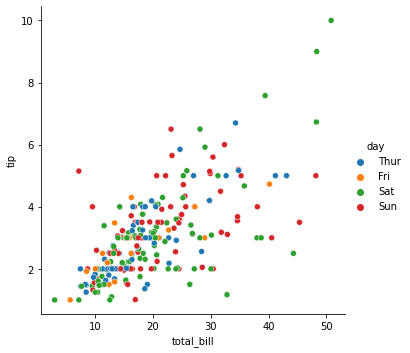

In [70]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df)

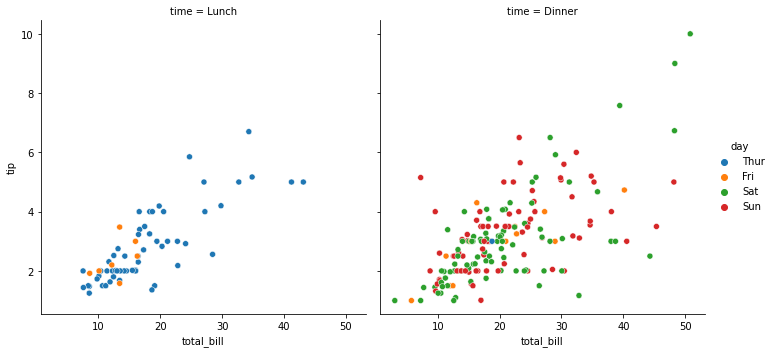

In [71]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df, col="time")

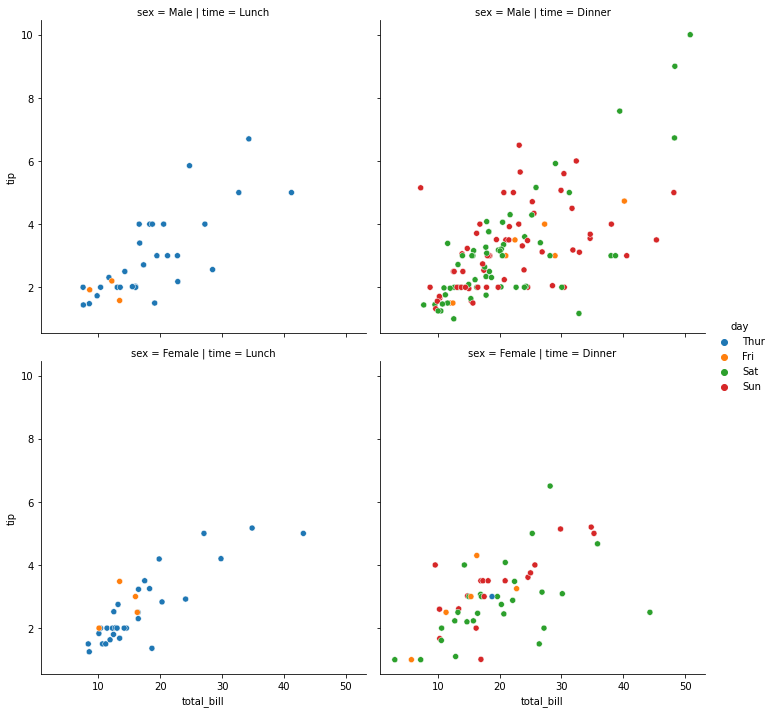

In [72]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df, col="time",row="sex")


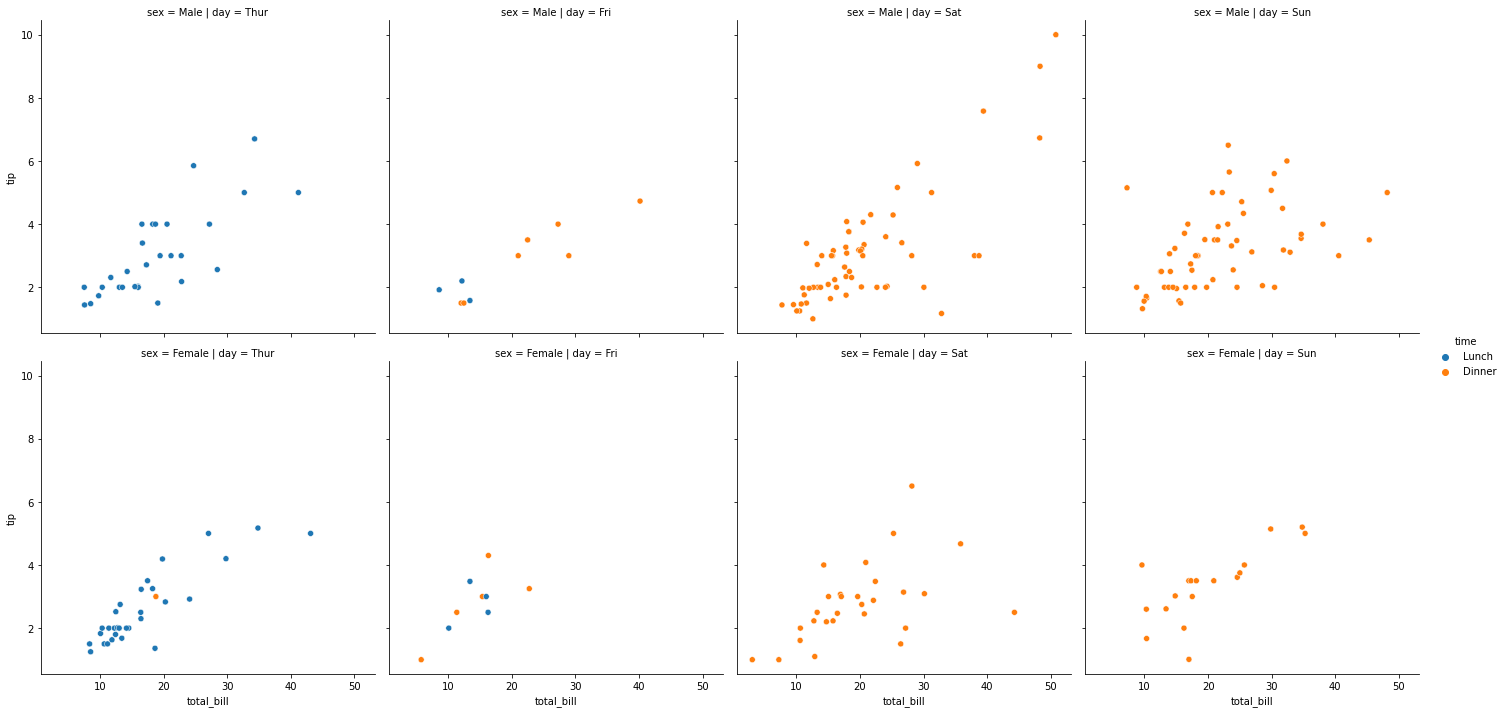

In [73]:
sns.relplot(x="total_bill",y="tip", hue="time",data=df, col="day",row = "sex")

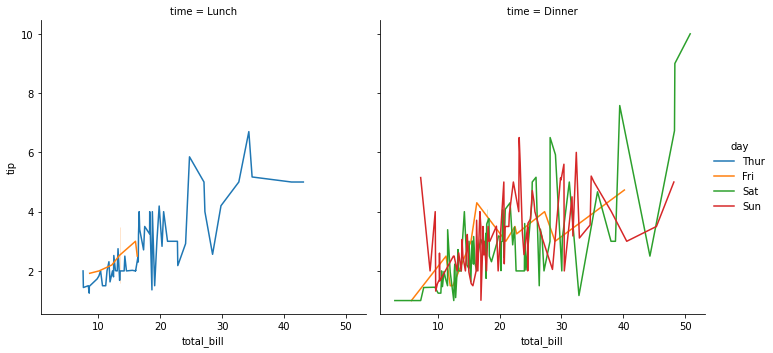

In [74]:
sns.relplot(x="total_bill",y="tip", hue="day",data=df, col="time", kind="line")

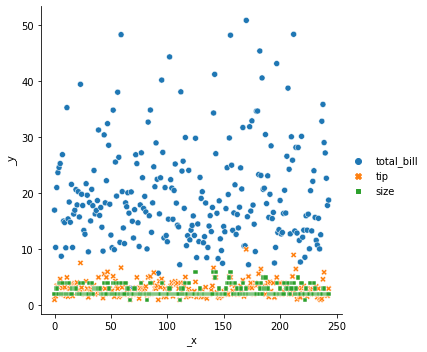

In [75]:
sns.relplot(data=df)

### **scatterplot**

In [76]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


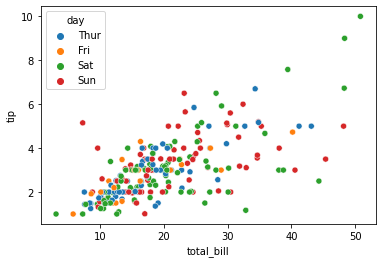

In [77]:
sns.scatterplot(x="total_bill",y="tip", hue="day",data=df)

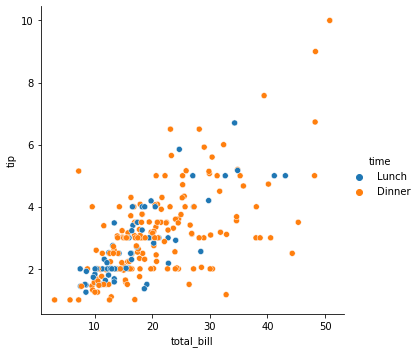

In [78]:
sns.relplot(x="total_bill",y="tip", hue="time",data=df)

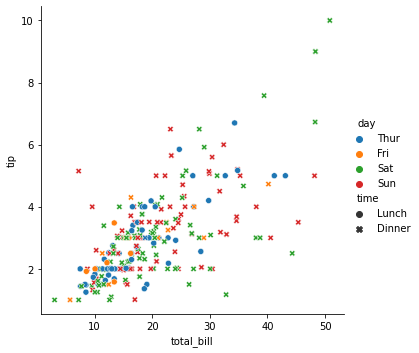

In [128]:
sns.relplot(x="total_bill",y="tip", hue="day",style="time",data=df)

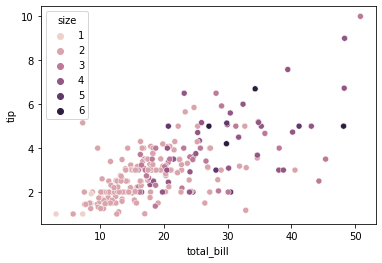

In [80]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue="size")

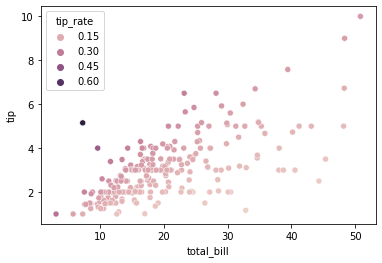

In [81]:
tip_rate = df.eval("tip/total_bill").rename("tip_rate")
sns.scatterplot(data=df,x="total_bill",y="tip",hue=tip_rate)

***Data extraction out of the scatterpolt***





In [82]:
df[df.eval("tip/total_bill") == df.eval("tip/total_bill").max()]

,total_bill,tip,sex,smoker,day,time,size
172,7.25,5.15,Male,Yes,Sun,Dinner,2


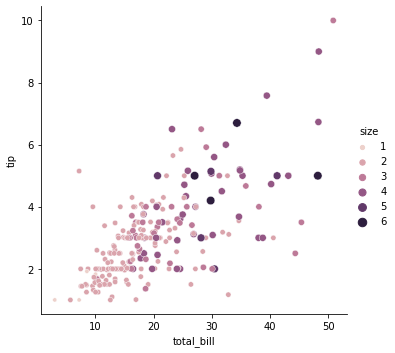

In [83]:
sns.relplot(data=df, x="total_bill", y="tip", hue = "size", size="size",kind="scatter")

### **lineplot**

In [84]:
df = sns.load_dataset("flights")

In [85]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [86]:
may_flights = df[df['month']=='May']
may_flights.head()

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229


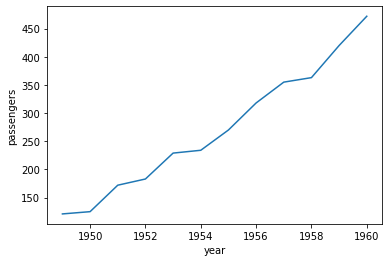

In [87]:
sns.lineplot(data=may_flights,x="year",y="passengers")

In [88]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [89]:
flights_pivot = df.pivot("year","month","passengers")
flights_pivot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


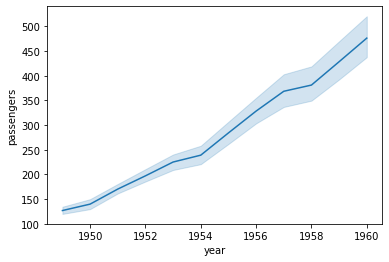

In [90]:
sns.lineplot(data=df,x="year",y="passengers")

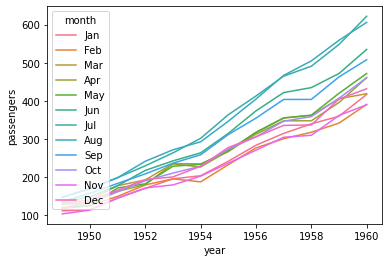

In [91]:
sns.lineplot(data=df,x="year",y="passengers",hue="month")

**A more Complex Dataset**

In [92]:
df = sns.load_dataset("fmri")
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


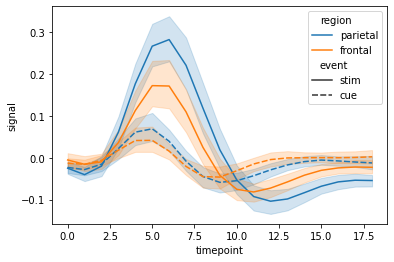

In [93]:
sns.lineplot(data=df,x='timepoint',y='signal',hue='region',style='event')

In [94]:
df = sns.load_dataset("dots").query("align == 'dots'")
df.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


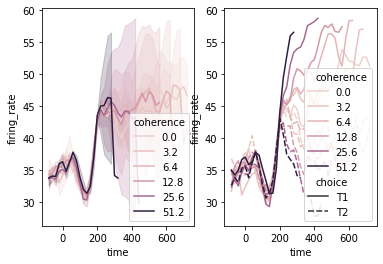

<Figure size 2880x1440 with 0 Axes>

In [95]:
fig,ax = plt.subplots(1,2)
plt.figure(figsize=(40,20))
sns.lineplot(data=df, x="time", y="firing_rate", hue="coherence",ax=ax[0])
sns.lineplot(data=df, x="time", y="firing_rate", hue="coherence", style="choice",ax=ax[1])
fig.show()

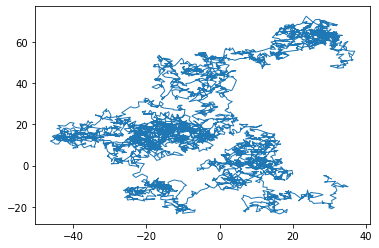

In [96]:
x, y = np.random.normal(size=(2, 5000)).cumsum(axis=1)
sns.lineplot(x=x, y=y, sort=False, lw=1)

## **Distribution Plots**

### **displot**

In [130]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


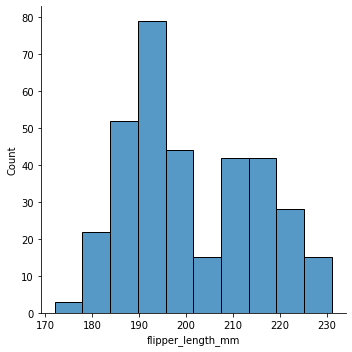

In [102]:
sns.displot(data=df, x="flipper_length_mm", kind="hist")

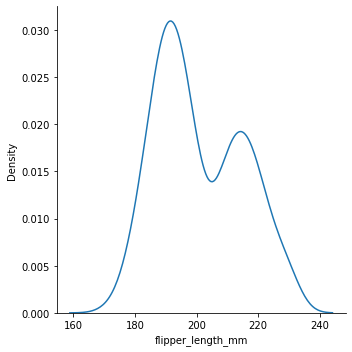

In [104]:
sns.displot(data=df, x="flipper_length_mm", kind="kde")

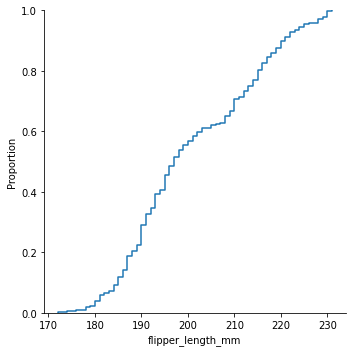

In [111]:
sns.displot(data=df, x="flipper_length_mm", kind="ecdf")


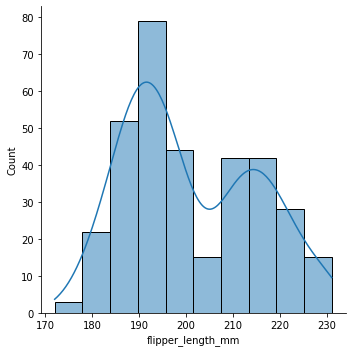

In [112]:
sns.displot(data=df, x="flipper_length_mm", kde = True)

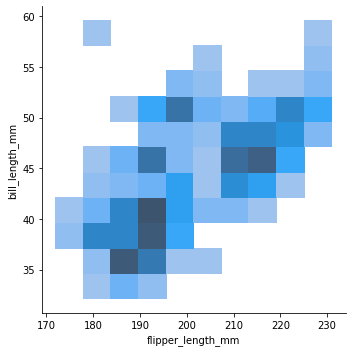

In [113]:
sns.displot(data=df, x="flipper_length_mm", y="bill_length_mm")

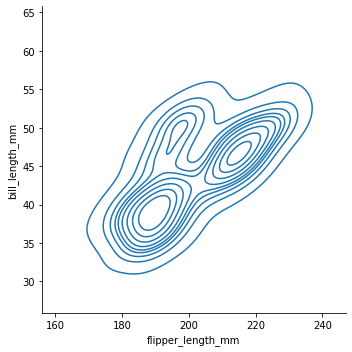

In [114]:
sns.displot(data=df, x="flipper_length_mm", y="bill_length_mm", kind="kde")

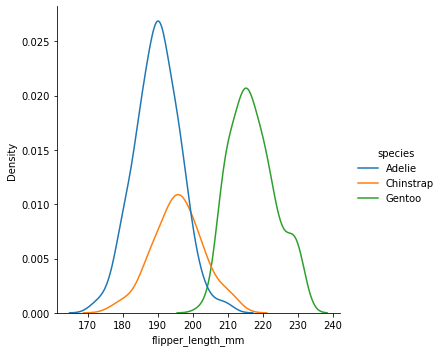

In [116]:
sns.displot(data=df, x="flipper_length_mm",hue="species", kind="kde")

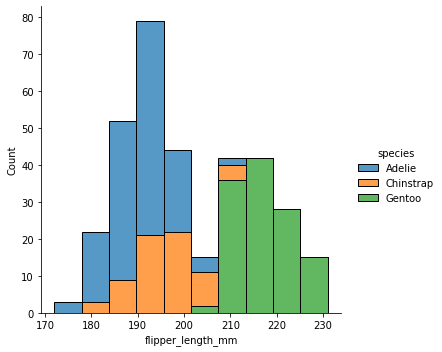

In [120]:
sns.displot(data=df, x="flipper_length_mm",hue="species", multiple="stack")

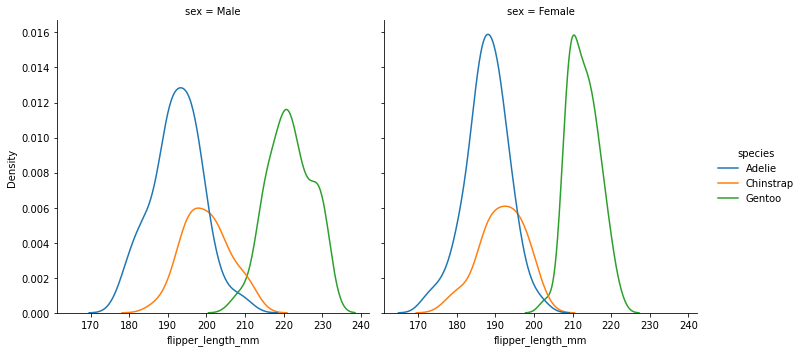

In [124]:
sns.displot(data=df, x="flipper_length_mm", hue="species", col="sex", kind="kde")

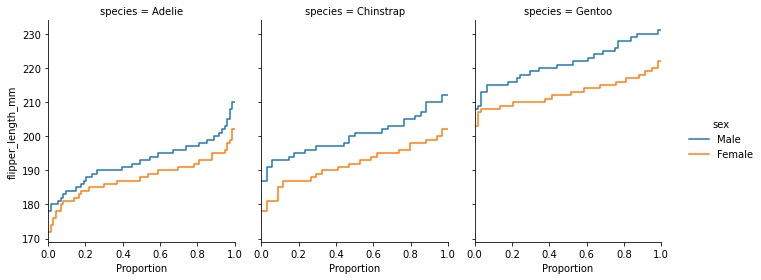

In [138]:
sns.displot(
    data=df, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.8,
)